## 分析雷达与卫星云图的准确性
- 数据抓取时间：北京时间22：40左右

### CMA Radar
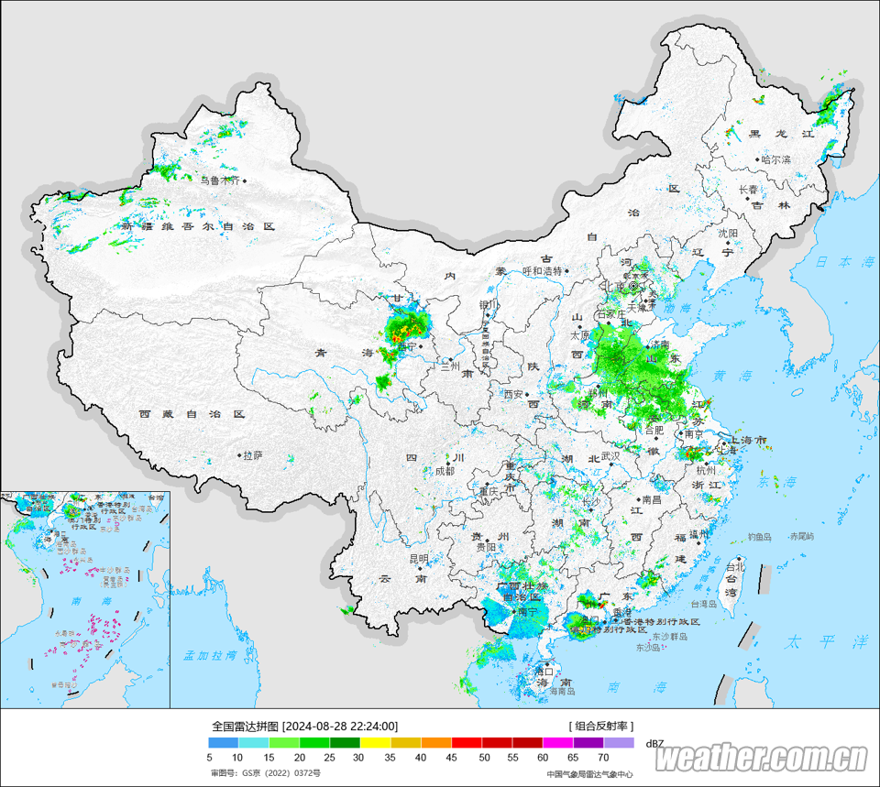

### 葵花卫星 - Heavy Rain Potential Mask
- UTC14：30
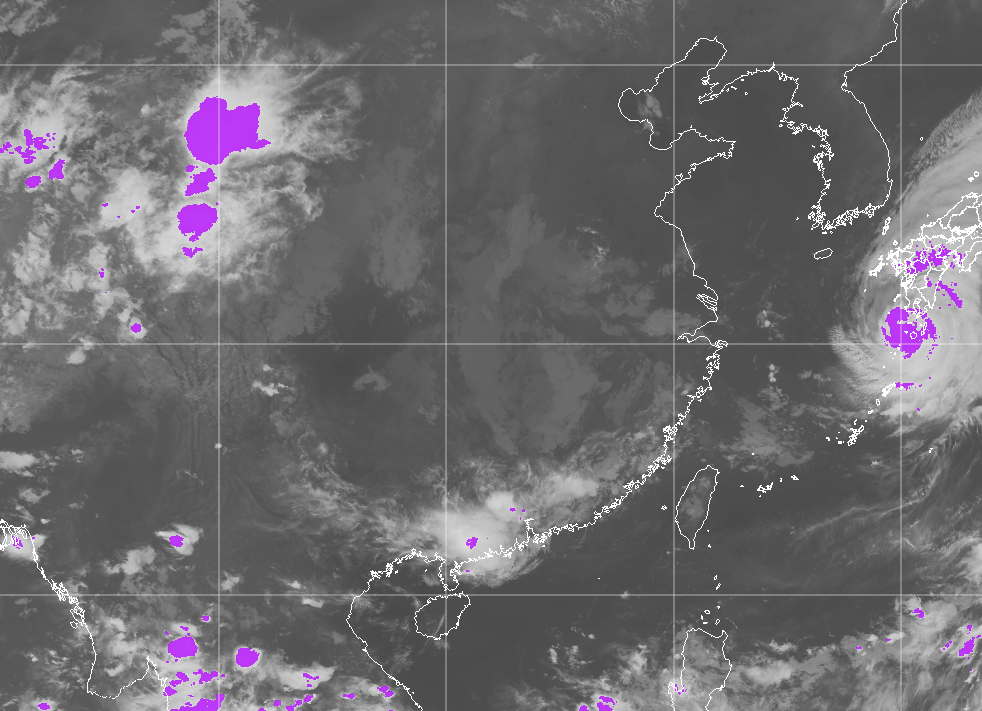

### 葵花卫星 - Original Band 13 
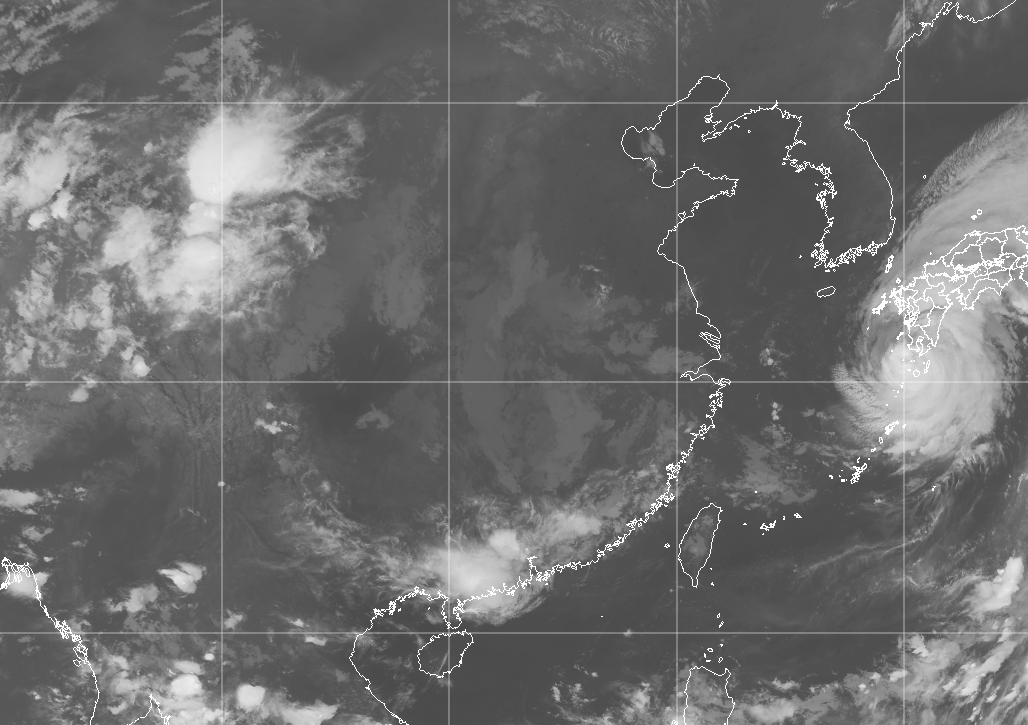

### 1. 雷达有回波，云图不支持

#### 气象局的雷达马赛克显示山东西部有大量回波， 但是从葵花卫星上看，有云，但不是高亮的，也就是不应该有大雨
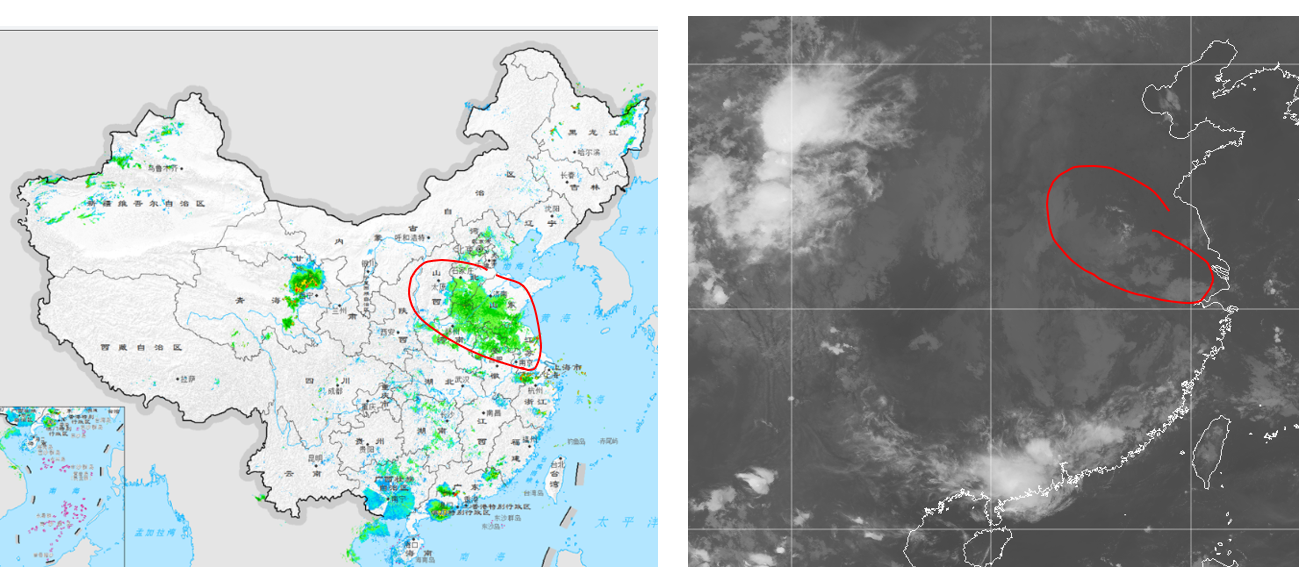

- 华北的雷达
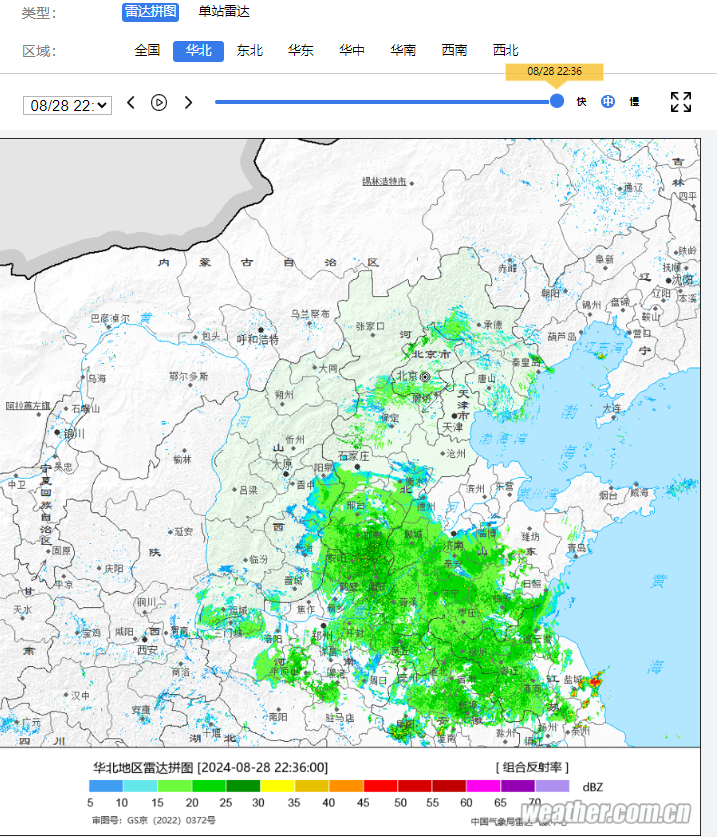

- 济南的单站雷达也显示没有大量回波
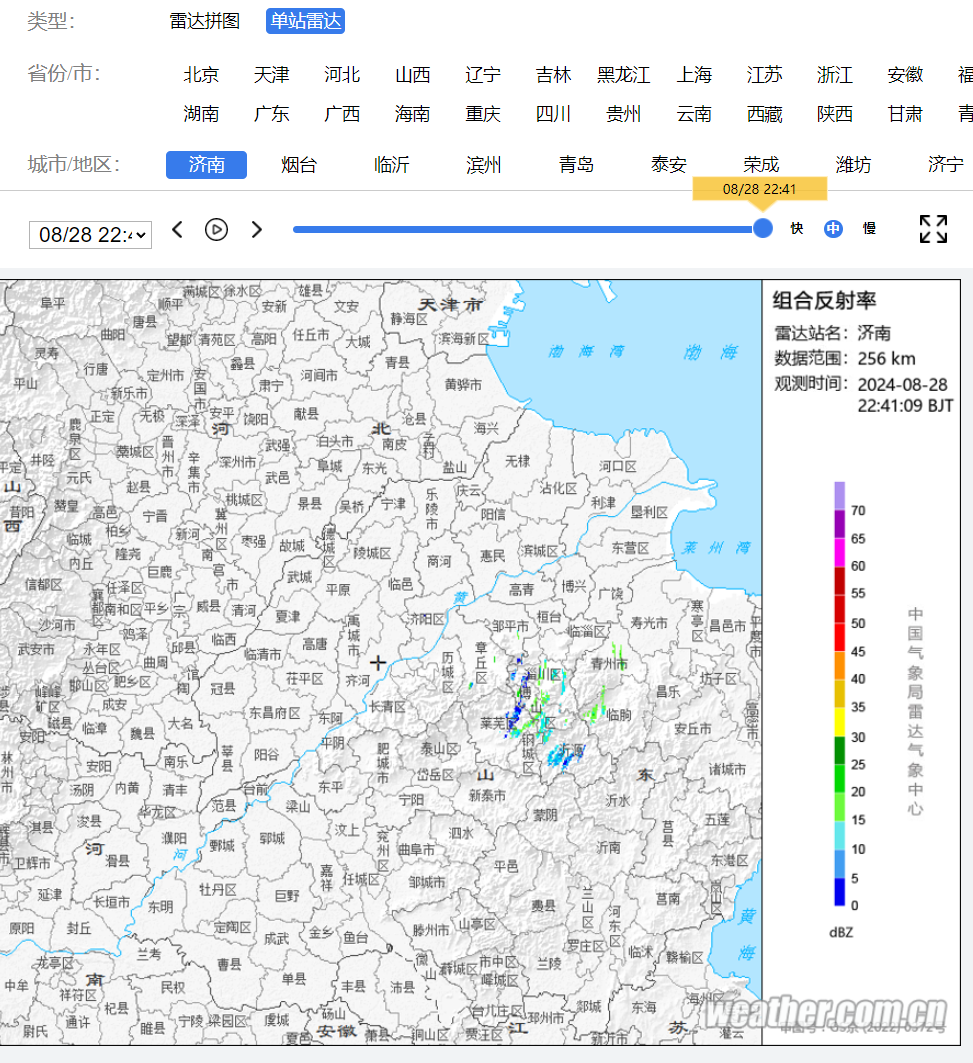

### 2. 逐小时降水实况和Heavy Rain Potential

- 气象局逐小时
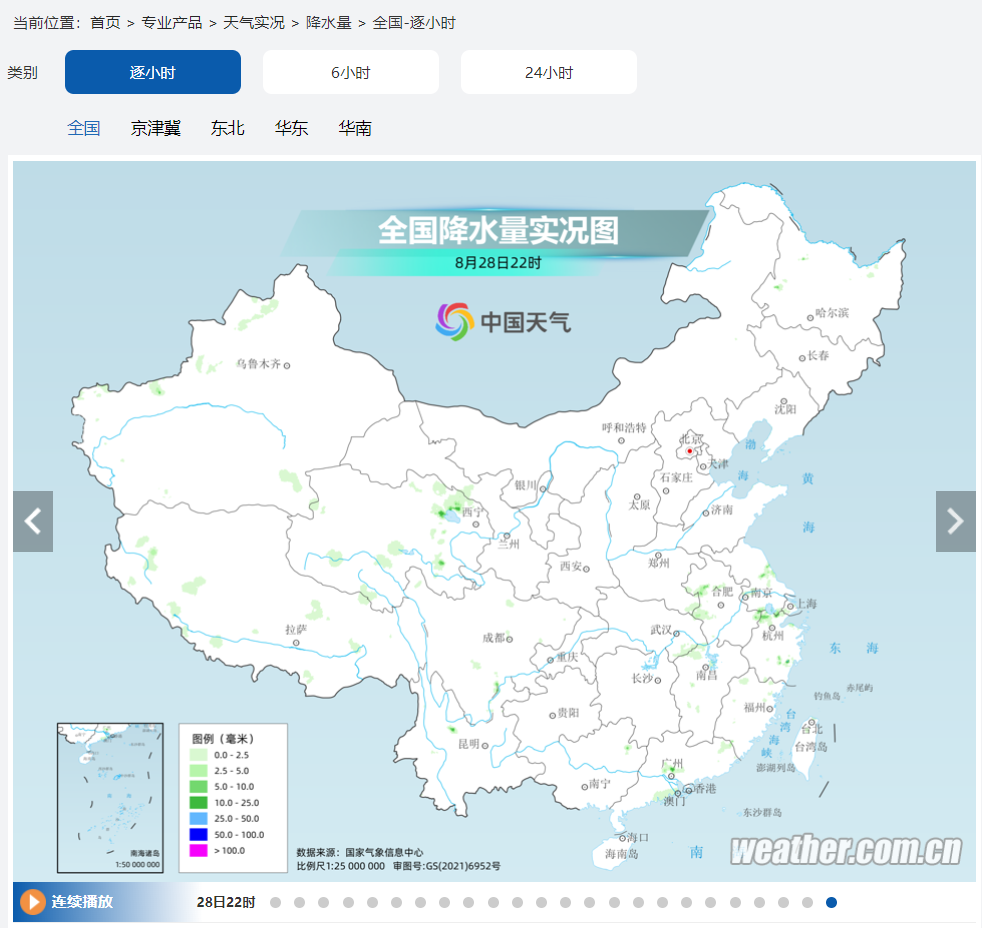


- 葵花的大雨可能性
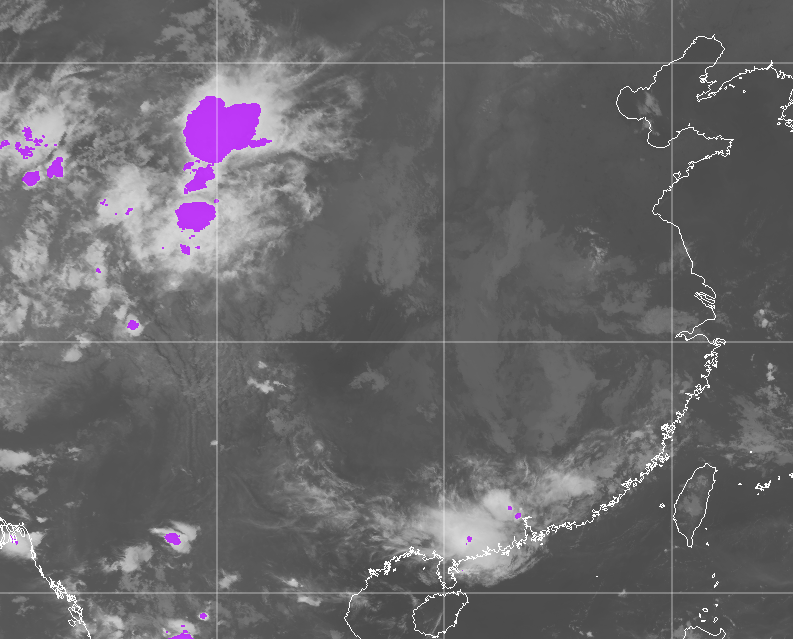

- 葵花卫星高亮区域
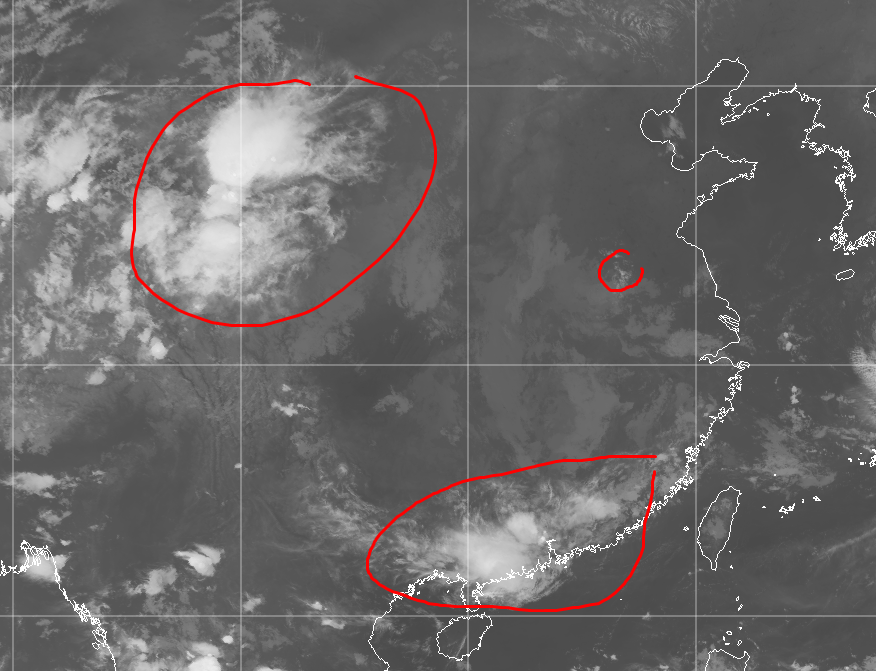

### 1小时降水量
- URL:http://www.nmc.cn/rest/real/rain/hour1/2024082902?_=1724871393862

In [4]:
import requests
import time
import json
from datetime import datetime, timedelta
import random

In [2]:
headers = {
    "Content-Type": "application/json, text/plain, */*",
    "Accept" : "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
    "Accept-Language":"en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7",
    "Accept-Encoding":"gzip, deflate, br",
    "Host":"www.nmc.cn"
    
}

In [12]:
dt= datetime.now()
ep = int(dt.timestamp())*1000
print(ep)

1724934933000


In [13]:
dth = "2024082902"
url = f"http://www.nmc.cn/rest/real/rain/hour1/{dth}?_={ep}"
print(url)
response = requests.get(url,headers=headers)

http://www.nmc.cn/rest/real/rain/hour1/2024082902?_=1724934933000


In [28]:
ret = response.json()
lst = ret['data']['data']
lst

[['青海', '互助', '52863', '', '', 32.7, '/publish/forecast/AQH/huzhu.html'],
 ['青海', '湟源', '52855', '', '', 22.7, '/publish/forecast/AQH/zuoyuan.html'],
 ['河南', '淮滨', '58205', '', '', 3.2, '/publish/forecast/AHA/huaibin.html'],
 ['青海', '门源', '52765', '', '', 3.1, '/publish/forecast/AQH/menyuan.html'],
 ['四川', '都江堰', '56188', '', '', 2.1, '/publish/forecast/ASC/dujiangyan.html'],
 ['青海', '海晏', '52853', '', '', 2.0, '/publish/forecast/AQH/haizuo.html'],
 ['青海', '西宁', '52866', '', '', 1.5, '/publish/forecast/AQH/xining.html'],
 ['四川', '绵竹', '56186', '', '', 0.8, '/publish/forecast/ASC/mianzhu.html'],
 ['上海', '南汇', '58369', '', '', 0.6, '/publish/forecast/china.html'],
 ['福建', '崇武', '59133', '', '', 0.6, '/publish/forecast/AFJ/chongwu.html'],
 ['浙江', '上虞', '58553', '', '', 0.4, '/publish/forecast/AZJ/shangyu.html'],
 ['新疆', '拜城', '51633', '', '', 0.4, '/publish/forecast/AXJ/baicheng.html'],
 ['上海', '闵行', '58361', '', '', 0.4, '/publish/forecast/ASH/zuoxing.html'],
 ['青海', '沙珠玉', '52941', '', 

In [39]:
path = r"D:\Tommy\++AI\himawari9\CMA_Stations"
fp = path+'\\CMA_1hour_Top_Locations_'+dth+'.csv'

f=open(fp,'w',encoding='utf-8')
f.write('province,loc_name,loc_id,vol,link\n')
for s in lst:
    if len(s)>6:
        f.write(s[0]+','+s[1]+','+s[2]+',' +str(s[5])+',' +s[6]+'\n')
f.close()

### Final Code to Download hourly precip

In [47]:
def save_result_to_csv(url,fp):
    headers = {
    "Content-Type": "application/json, text/plain, */*",
    "Accept" : "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
    "Accept-Language":"en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7",
    "Accept-Encoding":"gzip, deflate, br",
    "Host":"www.nmc.cn"
    
    }
    response = requests.get(url,headers=headers)
    ret = response.json()
    lst = ret['data']['data']
    f=open(fp,'w',encoding='utf-8')
    f.write('province,loc_name,loc_id,vol,link\n')
    for s in lst:
        if len(s)>6:
            f.write(s[0]+','+s[1]+','+s[2]+',' +str(s[5])+',' +s[6]+'\n')
    f.close()

In [52]:
datetime_str = '08/29/24 17:00:00'
dt = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
path = r"D:\Tommy\++AI\himawari9\CMA_Stations"

for k in range(7):
    dth = dt.strftime("%Y%m%d%H")
    print(dth)
    dt1= datetime.now()
    ep = int(dt1.timestamp())*1000
    url = f"http://www.nmc.cn/rest/real/rain/hour1/{dth}?_={ep}"
    #save response to csv file
    fp = path+'\\CMA_1hour_Top_Locations_'+dth+'.csv'
    save_result_to_csv(url,fp)
    dt = dt + timedelta(minutes=60)
    d = random.randint(3, 5)
    time.sleep(d)

2024082917
2024082918
2024082919
2024082920
2024082921
2024082922
2024082923


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Past Data in Chart
- http://www.nmc.cn/publish/forecast/AFJ/fuzhou.html
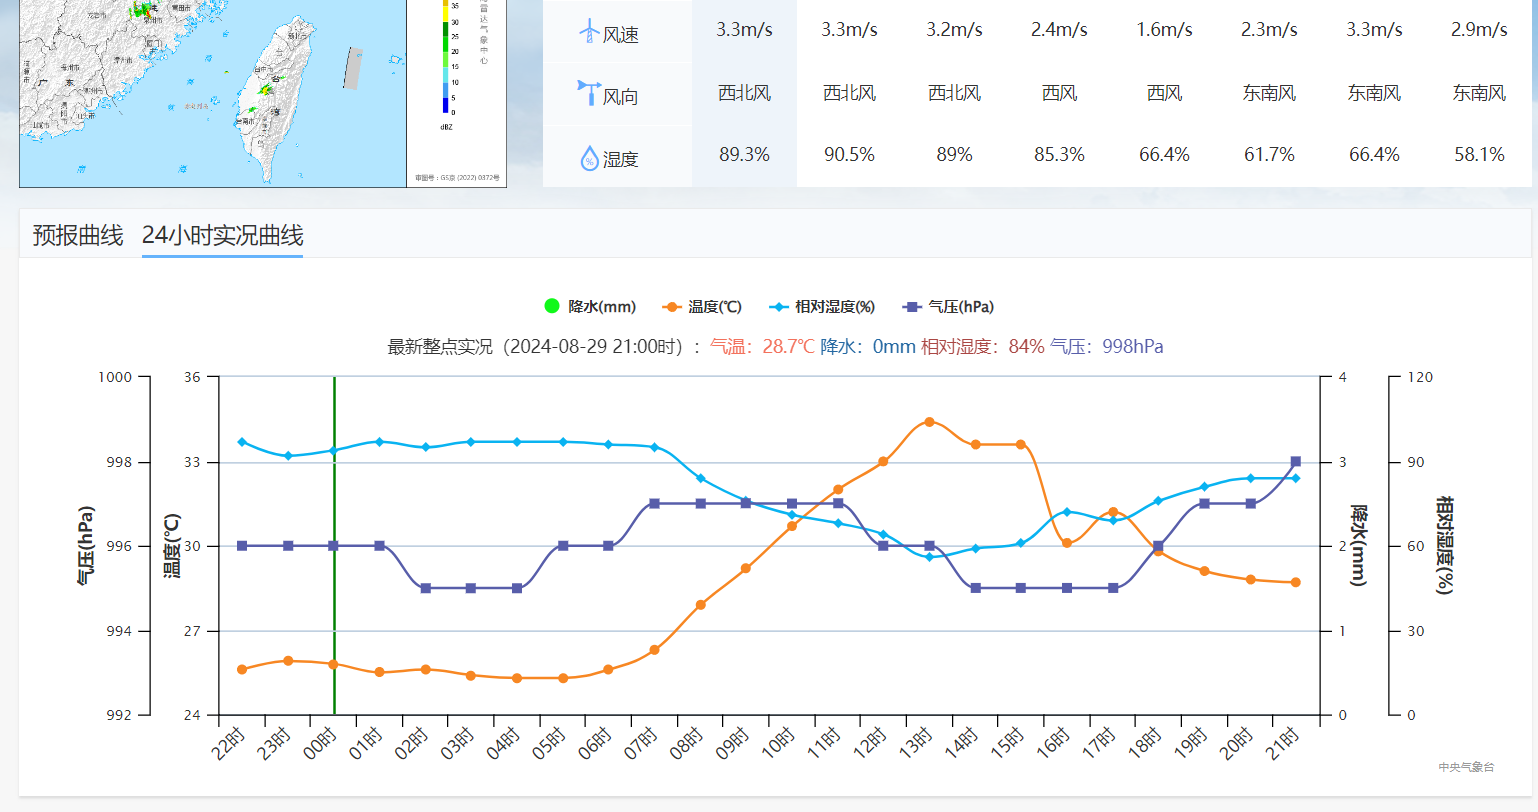